importing all the libraries 

In [93]:
# Disable jedi autocompleter
!pip install pyreadline
%config Completer.use_jedi = False

In [114]:
import yfinance as yt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from  sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [115]:
apple_data = yt.Ticker("AAPL")
apple_history_data = apple_data.history(period ="max")
apple_history_data.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100178,0.100614,0.100178,0.100178,469033600,0.0,0.0
1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800,0.0,0.0


In [116]:
apple_df1 = pd.DataFrame({"Close":apple_history_data["Close"]})
apple_df1

,Close
Date,
1980-12-12,0.100178
1980-12-15,0.094952
1980-12-16,0.087983
1980-12-17,0.090160
1980-12-18,0.092774
...,...
2022-07-25,152.949997
2022-07-26,151.600006
2022-07-27,156.789993


In [117]:
apple_df1 = apple_df1.rename(columns ={"Close" : "Real_Time_Close"})
apple_df1

,Real_Time_Close
Date,
1980-12-12,0.100178
1980-12-15,0.094952
1980-12-16,0.087983
1980-12-17,0.090160
1980-12-18,0.092774
...,...
2022-07-25,152.949997
2022-07-26,151.600006
2022-07-27,156.789993


In [118]:
apple_df1["target"] = apple_history_data.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]
apple_df2 = apple_df1.iloc[1:,:]
apple_df2.head()

,Real_Time_Close,target
Date,,
1980-12-15,0.094952,0.0
1980-12-16,0.087983,0.0
1980-12-17,0.090160,1.0
1980-12-18,0.092774,1.0
1980-12-19,0.098436,1.0


In [119]:
apple_prev_history_data = apple_history_data.shift(1).iloc[1:,:]
apple_prev_history_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-15,0.100178,0.100614,0.100178,0.100178,469033600.0,0.0,0.0
1980-12-16,0.095388,0.095388,0.094952,0.094952,175884800.0,0.0,0.0
1980-12-17,0.088418,0.088418,0.087983,0.087983,105728000.0,0.0,0.0
1980-12-18,0.090160,0.090596,0.090160,0.090160,86441600.0,0.0,0.0
1980-12-19,0.092774,0.093210,0.092774,0.092774,73449600.0,0.0,0.0
...,...,...,...,...,...,...,...
2022-07-25,155.389999,156.279999,153.410004,154.089996,66625400.0,0.0,0.0
2022-07-26,154.009995,155.039993,152.279999,152.949997,53623900.0,0.0,0.0
2022-07-27,152.259995,153.089996,150.800003,151.600006,55138700.0,0.0,0.0


In [120]:
apple_recreated_dataset =apple_df1.join(apple_prev_history_data)
apple_recreated_dataset =apple_recreated_dataset.iloc[1:,:]
apple_recreated_dataset

,Real_Time_Close,target,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,,
1980-12-15,0.094952,0.0,0.100178,0.100614,0.100178,0.100178,469033600.0,0.0,0.0
1980-12-16,0.087983,0.0,0.095388,0.095388,0.094952,0.094952,175884800.0,0.0,0.0
1980-12-17,0.090160,1.0,0.088418,0.088418,0.087983,0.087983,105728000.0,0.0,0.0
1980-12-18,0.092774,1.0,0.090160,0.090596,0.090160,0.090160,86441600.0,0.0,0.0
1980-12-19,0.098436,1.0,0.092774,0.093210,0.092774,0.092774,73449600.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2022-07-25,152.949997,0.0,155.389999,156.279999,153.410004,154.089996,66625400.0,0.0,0.0
2022-07-26,151.600006,0.0,154.009995,155.039993,152.279999,152.949997,53623900.0,0.0,0.0
2022-07-27,156.789993,1.0,152.259995,153.089996,150.800003,151.600006,55138700.0,0.0,0.0


Lets see what are the featuers that impacting to target column directly

<AxesSubplot:>

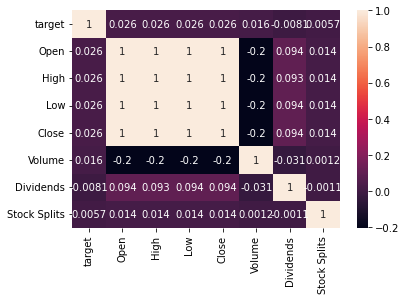

In [121]:
apple_recreated_dataset_dummy = apple_recreated_dataset.drop("Real_Time_Close" , axis ="columns")
#pple_recreated_dataset
sb.heatmap(apple_recreated_dataset_dummy.corr() , annot =True )

Acording to the following heatmap , we can decide "Dividends" and "Stock Splits" are less impact than other features

In [122]:
apple_recreated_dataset.drop(["Dividends" , "Stock Splits"] , axis =1)

,Real_Time_Close,target,Open,High,Low,Close,Volume
Date,,,,,,,
1980-12-15,0.094952,0.0,0.100178,0.100614,0.100178,0.100178,469033600.0
1980-12-16,0.087983,0.0,0.095388,0.095388,0.094952,0.094952,175884800.0
1980-12-17,0.090160,1.0,0.088418,0.088418,0.087983,0.087983,105728000.0
1980-12-18,0.092774,1.0,0.090160,0.090596,0.090160,0.090160,86441600.0
1980-12-19,0.098436,1.0,0.092774,0.093210,0.092774,0.092774,73449600.0
...,...,...,...,...,...,...,...
2022-07-25,152.949997,0.0,155.389999,156.279999,153.410004,154.089996,66625400.0
2022-07-26,151.600006,0.0,154.009995,155.039993,152.279999,152.949997,53623900.0
2022-07-27,156.789993,1.0,152.259995,153.089996,150.800003,151.600006,55138700.0


Lets dived the columns for train and test datas

In [123]:
predictors =["Open" , "High" , "Low" , "Close" , "Volume"]
X_data = apple_recreated_dataset[predictors]
Y_data = apple_recreated_dataset.target
X_train , X_test , Y_train , Y_test =train_test_split(X_data , Y_data , test_size =0.2 , random_state =1)

Now DataSet is fully functionalized.Lets findout the sutaible model for this case


In [124]:


models_params={ "randome_forest": {"model":RandomForestClassifier(n_jobs=6 , random_state=1) ,
                                   "params":{"n_estimators" :[10 ,20, 50,100] , "criterion" :["entropy"] }} ,
                "LogisticRegression" :{"model": LogisticRegression(multi_class="auto" , n_jobs=6 , random_state=1) ,
                                    "params": {"C":[1,5,10] }} ,
                }
Score =[]
for models_names ,mp in models_params.items():
    clf =GridSearchCV(mp["model"] ,mp["params"] ,cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    Score.append({
        "model":models_names,
        "best_score":clf.best_score_,
        "best_params":clf.best_params_
    })
    
model_selection= pd.DataFrame(Score , columns=["model" , "best_score" ,"best_params"])
model_selection

,model,best_score,best_params
0,randome_forest,0.507385,"{'criterion': 'entropy', 'n_estimators': 100}"
1,LogisticRegression,0.497737,{'C': 1}


Dont add SVM module to GridSearchCV , otherwise it will take 5,6 hours to execute. so lets try SVM module apart of GridSearchCV

In [125]:
model_svm = SVC(random_state =1)
model_svm.fit(X_train , Y_train)
model_svm.score(X_test , Y_test)

0.5069080514530729

RandomForestClassifier is better to use

In [126]:
model_randomforest = RandomForestClassifier(n_jobs=6 , random_state=1 ,n_estimators =1 , criterion = "entropy" )

In [127]:
model_randomforest.fit(X_train , Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1, n_jobs=6,
                       random_state=1)

In [128]:
model_randomforest.score(X_test , Y_test)

0.5045259647451167

### The best way to predict stock price level

in this way we gonna split all the datas and put into the test


            Real  Predictors
Date                        
1984-11-27   1.0         1.0
1984-11-28   1.0         1.0
1984-11-29   0.0         1.0
1984-11-30   0.0         1.0
1984-12-03   0.0         1.0
...          ...         ...
1986-01-29   1.0         0.0
1986-01-30   0.0         0.0
1986-01-31   1.0         0.0
1986-02-03   1.0         1.0
1986-02-04   0.0         0.0

[300 rows x 2 columns]


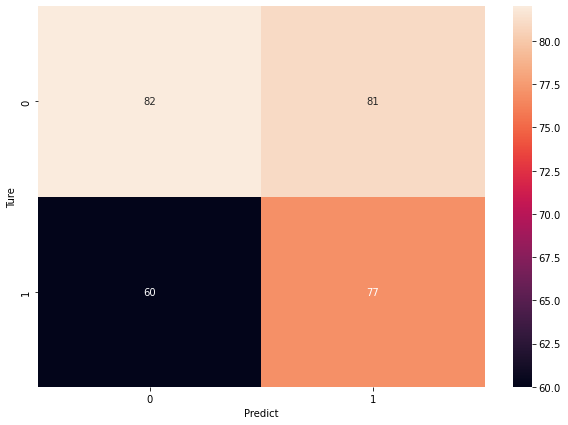

            Real  Predictors
Date                        
1986-02-05   0.0         1.0
1986-02-06   1.0         0.0
1986-02-07   0.0         1.0
1986-02-10   0.0         1.0
1986-02-11   0.0         0.0
...          ...         ...
1987-04-07   0.0         0.0
1987-04-08   1.0         0.0
1987-04-09   1.0         0.0
1987-04-10   0.0         0.0
1987-04-13   0.0         0.0

[300 rows x 2 columns]


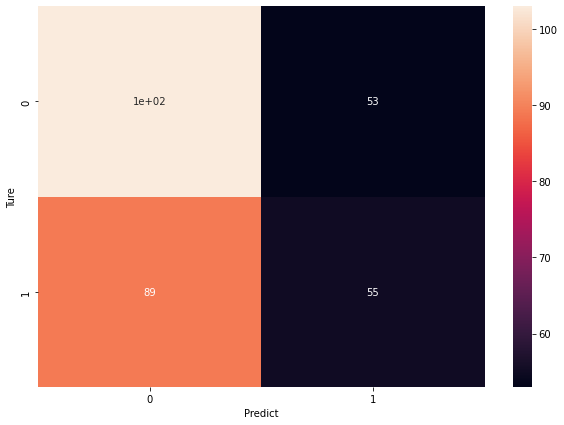

            Real  Predictors
Date                        
1987-04-14   1.0         0.0
1987-04-15   1.0         0.0
1987-04-16   1.0         0.0
1987-04-20   0.0         0.0
1987-04-21   1.0         0.0
...          ...         ...
1988-06-14   1.0         0.0
1988-06-15   1.0         0.0
1988-06-16   0.0         0.0
1988-06-17   1.0         0.0
1988-06-20   0.0         0.0

[300 rows x 2 columns]


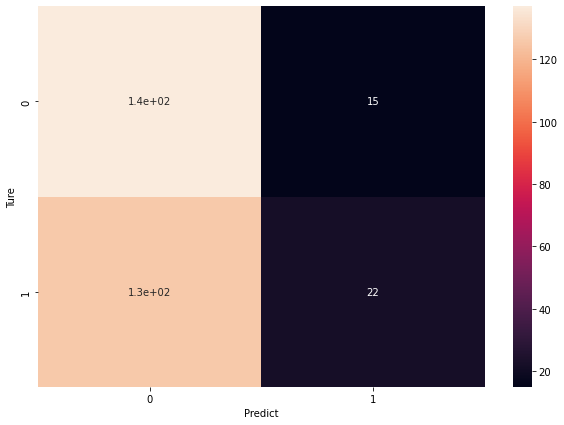

            Real  Predictors
Date                        
1988-06-21   1.0         0.0
1988-06-22   1.0         1.0
1988-06-23   0.0         1.0
1988-06-24   0.0         0.0
1988-06-27   0.0         0.0
...          ...         ...
1989-08-21   1.0         1.0
1989-08-22   1.0         1.0
1989-08-23   1.0         1.0
1989-08-24   1.0         1.0
1989-08-25   1.0         1.0

[300 rows x 2 columns]


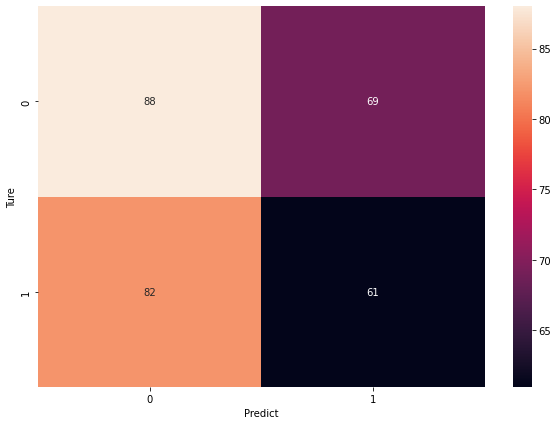

            Real  Predictors
Date                        
1989-08-28   0.0         1.0
1989-08-29   0.0         1.0
1989-08-30   1.0         1.0
1989-08-31   0.0         0.0
1989-09-01   1.0         0.0
...          ...         ...
1990-10-26   0.0         0.0
1990-10-29   0.0         0.0
1990-10-30   1.0         0.0
1990-10-31   1.0         1.0
1990-11-01   0.0         1.0

[300 rows x 2 columns]


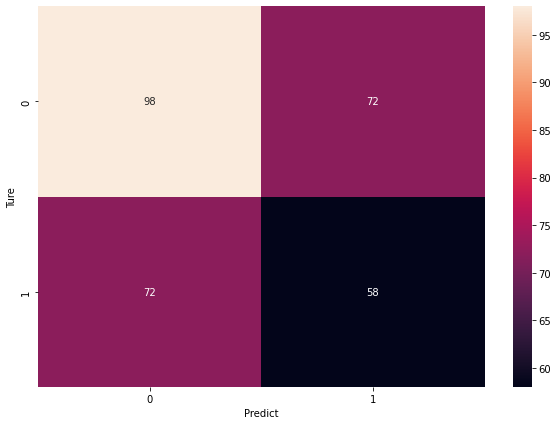

            Real  Predictors
Date                        
1990-11-02   1.0         1.0
1990-11-05   1.0         0.0
1990-11-06   1.0         0.0
1990-11-07   0.0         1.0
1990-11-08   1.0         1.0
...          ...         ...
1992-01-06   0.0         0.0
1992-01-07   1.0         0.0
1992-01-08   1.0         0.0
1992-01-09   1.0         0.0
1992-01-10   0.0         0.0

[300 rows x 2 columns]


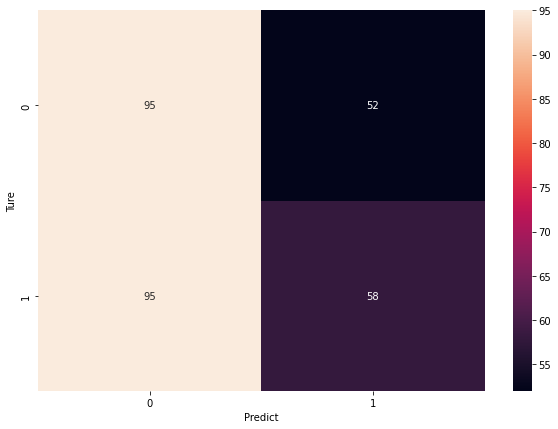

            Real  Predictors
Date                        
1992-01-13   0.0         0.0
1992-01-14   1.0         1.0
1992-01-15   0.0         1.0
1992-01-16   0.0         1.0
1992-01-17   1.0         1.0
...          ...         ...
1993-03-12   0.0         1.0
1993-03-15   1.0         0.0
1993-03-16   0.0         0.0
1993-03-17   0.0         1.0
1993-03-18   0.0         0.0

[300 rows x 2 columns]


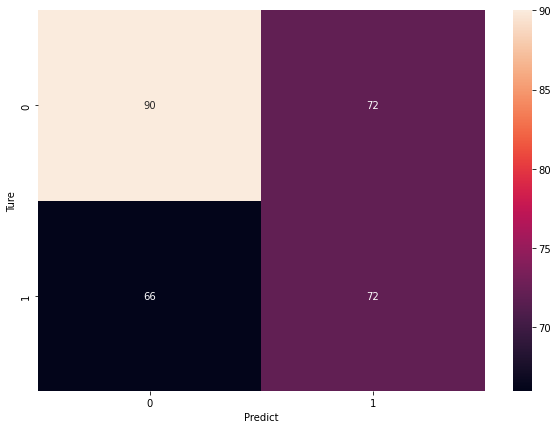

            Real  Predictors
Date                        
1993-03-19   0.0         0.0
1993-03-22   0.0         0.0
1993-03-23   0.0         1.0
1993-03-24   1.0         0.0
1993-03-25   1.0         1.0
...          ...         ...
1994-05-19   1.0         1.0
1994-05-20   0.0         1.0
1994-05-23   0.0         0.0
1994-05-24   1.0         1.0
1994-05-25   1.0         1.0

[300 rows x 2 columns]


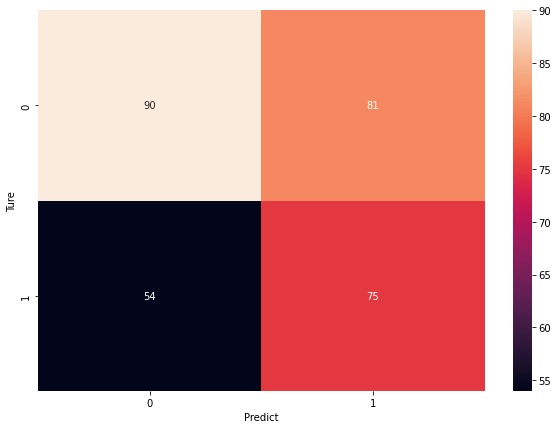

            Real  Predictors
Date                        
1994-05-26   0.0         1.0
1994-05-27   0.0         0.0
1994-05-31   0.0         1.0
1994-06-01   0.0         0.0
1994-06-02   0.0         1.0
...          ...         ...
1995-07-27   1.0         0.0
1995-07-28   0.0         1.0
1995-07-31   0.0         0.0
1995-08-01   0.0         1.0
1995-08-02   1.0         1.0

[300 rows x 2 columns]


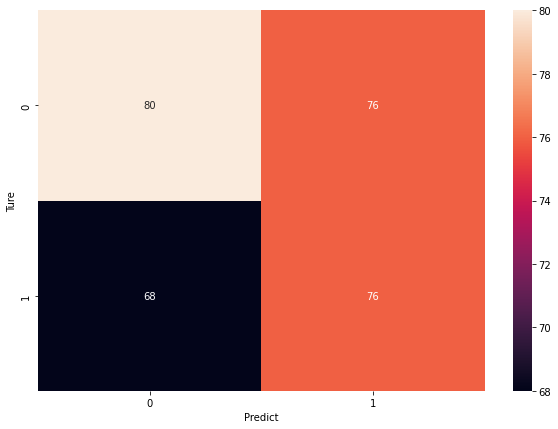

            Real  Predictors
Date                        
1995-08-03   1.0         0.0
1995-08-04   0.0         1.0
1995-08-07   0.0         1.0
1995-08-08   0.0         1.0
1995-08-09   1.0         1.0
...          ...         ...
1996-10-02   0.0         0.0
1996-10-03   0.0         1.0
1996-10-04   1.0         0.0
1996-10-07   1.0         1.0
1996-10-08   1.0         1.0

[300 rows x 2 columns]


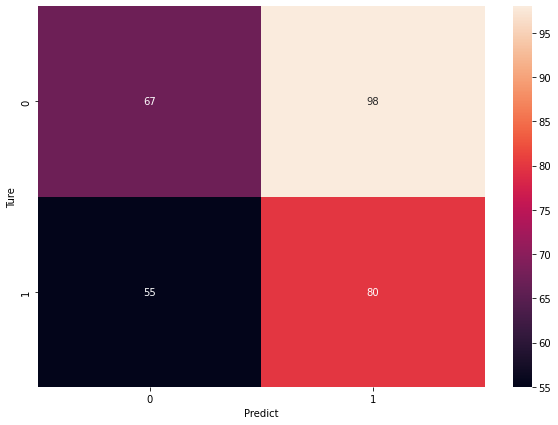

            Real  Predictors
Date                        
1996-10-09   0.0         1.0
1996-10-10   1.0         1.0
1996-10-11   1.0         1.0
1996-10-14   1.0         0.0
1996-10-15   0.0         0.0
...          ...         ...
1997-12-09   0.0         1.0
1997-12-10   0.0         1.0
1997-12-11   0.0         0.0
1997-12-12   0.0         0.0
1997-12-15   0.0         0.0

[300 rows x 2 columns]


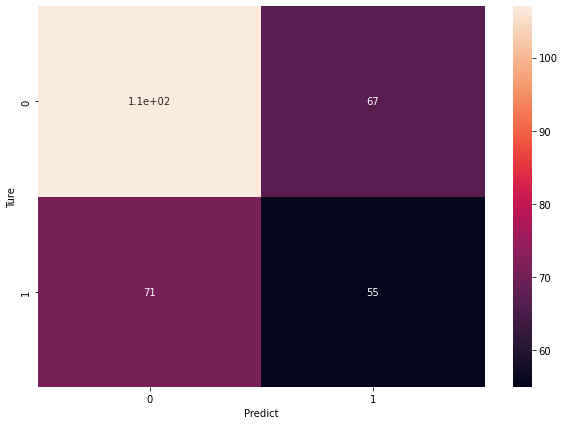

            Real  Predictors
Date                        
1997-12-16   1.0         1.0
1997-12-17   0.0         1.0
1997-12-18   0.0         1.0
1997-12-19   0.0         0.0
1997-12-22   0.0         1.0
...          ...         ...
1999-02-19   1.0         0.0
1999-02-22   1.0         1.0
1999-02-23   0.0         0.0
1999-02-24   0.0         0.0
1999-02-25   0.0         0.0

[300 rows x 2 columns]


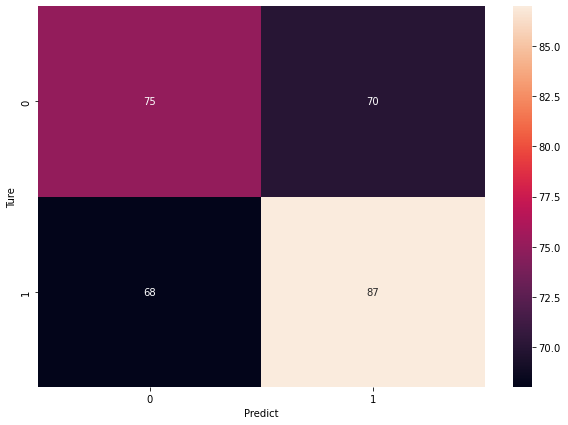

            Real  Predictors
Date                        
1999-02-26   0.0         0.0
1999-03-01   0.0         0.0
1999-03-02   1.0         1.0
1999-03-03   0.0         1.0
1999-03-04   0.0         1.0
...          ...         ...
2000-04-27   1.0         0.0
2000-04-28   0.0         0.0
2000-05-01   1.0         0.0
2000-05-02   0.0         0.0
2000-05-03   0.0         0.0

[300 rows x 2 columns]


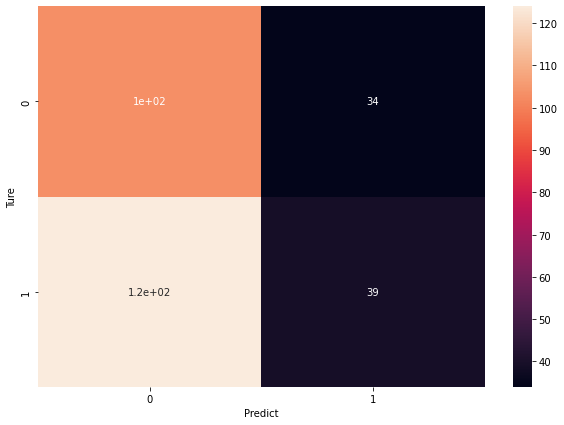

            Real  Predictors
Date                        
2000-05-04   0.0         0.0
2000-05-05   1.0         1.0
2000-05-08   0.0         0.0
2000-05-09   0.0         1.0
2000-05-10   0.0         0.0
...          ...         ...
2001-07-06   0.0         1.0
2001-07-09   1.0         1.0
2001-07-10   0.0         1.0
2001-07-11   1.0         1.0
2001-07-12   1.0         1.0

[300 rows x 2 columns]


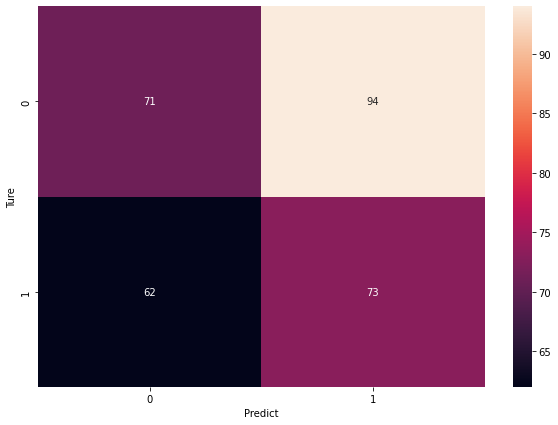

            Real  Predictors
Date                        
2001-07-13   1.0         0.0
2001-07-16   0.0         1.0
2001-07-17   1.0         1.0
2001-07-18   0.0         1.0
2001-07-19   0.0         0.0
...          ...         ...
2002-09-19   0.0         0.0
2002-09-20   1.0         0.0
2002-09-23   0.0         1.0
2002-09-24   0.0         1.0
2002-09-25   1.0         0.0

[300 rows x 2 columns]


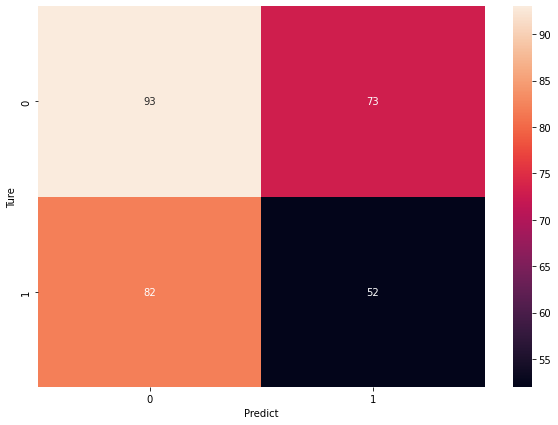

            Real  Predictors
Date                        
2002-09-26   0.0         1.0
2002-09-27   1.0         0.0
2002-09-30   0.0         1.0
2002-10-01   1.0         1.0
2002-10-02   0.0         1.0
...          ...         ...
2003-11-26   1.0         0.0
2003-11-28   1.0         0.0
2003-12-01   1.0         0.0
2003-12-02   0.0         1.0
2003-12-03   0.0         1.0

[300 rows x 2 columns]


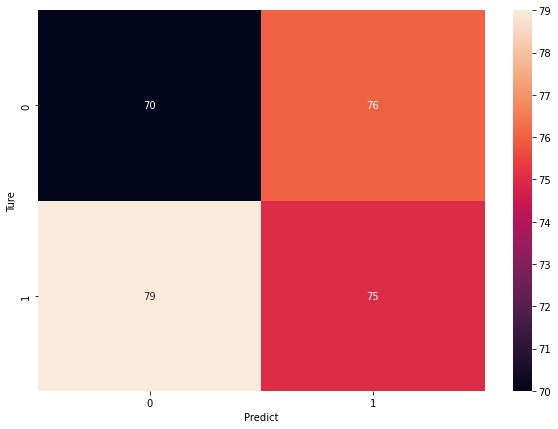

            Real  Predictors
Date                        
2003-12-04   1.0         0.0
2003-12-05   0.0         0.0
2003-12-08   1.0         1.0
2003-12-09   0.0         1.0
2003-12-10   0.0         0.0
...          ...         ...
2005-02-07   1.0         0.0
2005-02-08   1.0         0.0
2005-02-09   0.0         0.0
2005-02-10   0.0         0.0
2005-02-11   1.0         0.0

[300 rows x 2 columns]


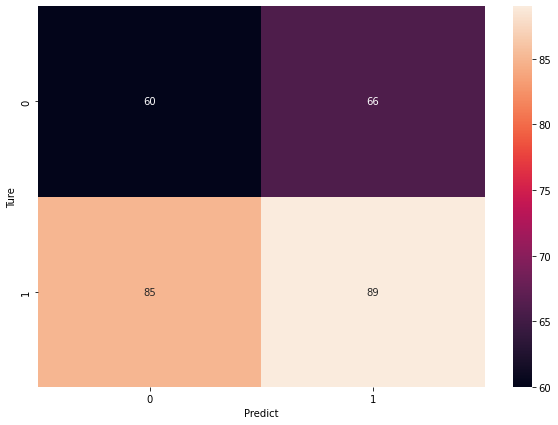

            Real  Predictors
Date                        
2005-02-14   1.0         0.0
2005-02-15   1.0         0.0
2005-02-16   1.0         0.0
2005-02-17   0.0         0.0
2005-02-18   0.0         0.0
...          ...         ...
2006-04-18   1.0         0.0
2006-04-19   0.0         0.0
2006-04-20   1.0         0.0
2006-04-21   0.0         0.0
2006-04-24   0.0         0.0

[300 rows x 2 columns]


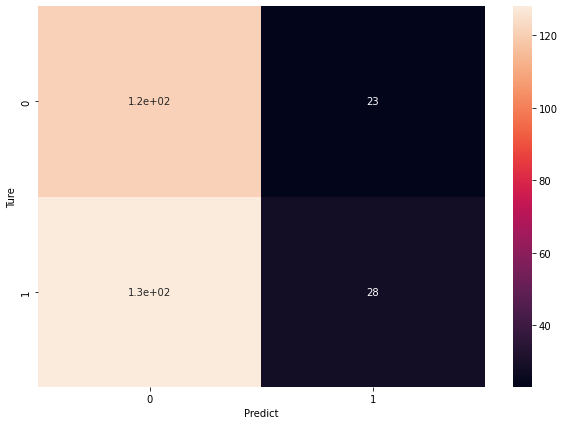

            Real  Predictors
Date                        
2006-04-25   1.0         1.0
2006-04-26   1.0         1.0
2006-04-27   1.0         1.0
2006-04-28   1.0         0.0
2006-05-01   0.0         1.0
...          ...         ...
2007-06-27   1.0         0.0
2007-06-28   0.0         0.0
2007-06-29   1.0         0.0
2007-07-02   0.0         0.0
2007-07-03   1.0         0.0

[300 rows x 2 columns]


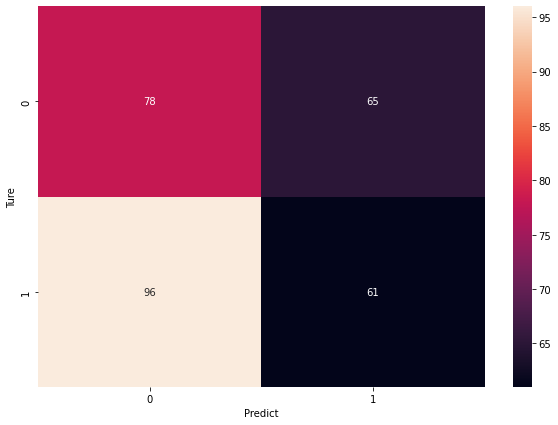

            Real  Predictors
Date                        
2007-07-05   1.0         1.0
2007-07-06   0.0         0.0
2007-07-09   0.0         0.0
2007-07-10   1.0         0.0
2007-07-11   1.0         0.0
...          ...         ...
2008-09-04   0.0         1.0
2008-09-05   0.0         1.0
2008-09-08   0.0         0.0
2008-09-09   0.0         0.0
2008-09-10   0.0         0.0

[300 rows x 2 columns]


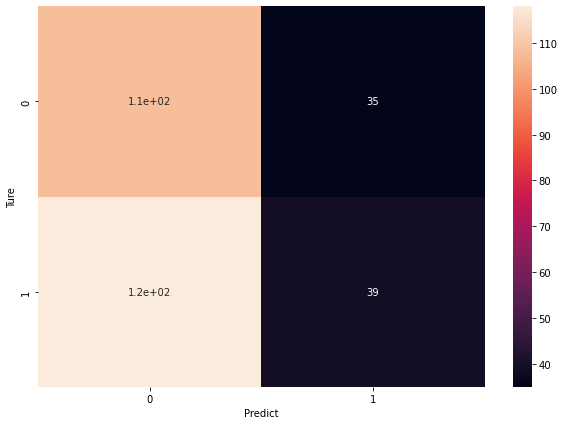

            Real  Predictors
Date                        
2008-09-11   1.0         1.0
2008-09-12   0.0         1.0
2008-09-15   0.0         1.0
2008-09-16   0.0         1.0
2008-09-17   0.0         1.0
...          ...         ...
2009-11-11   1.0         0.0
2009-11-12   0.0         0.0
2009-11-13   1.0         0.0
2009-11-16   1.0         0.0
2009-11-17   1.0         0.0

[300 rows x 2 columns]


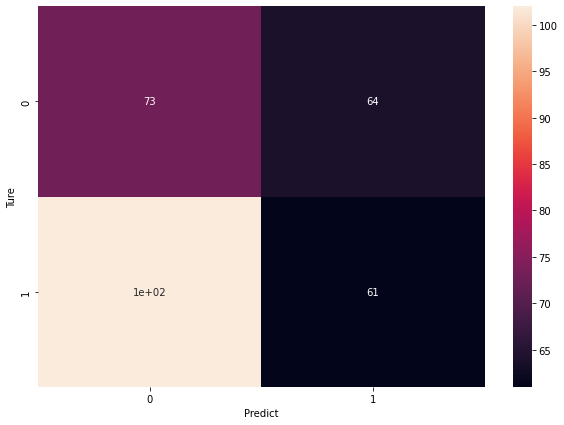

            Real  Predictors
Date                        
2009-11-18   0.0         1.0
2009-11-19   0.0         0.0
2009-11-20   0.0         0.0
2009-11-23   1.0         1.0
2009-11-24   0.0         0.0
...          ...         ...
2011-01-21   0.0         1.0
2011-01-24   1.0         1.0
2011-01-25   1.0         1.0
2011-01-26   1.0         1.0
2011-01-27   0.0         1.0

[300 rows x 2 columns]


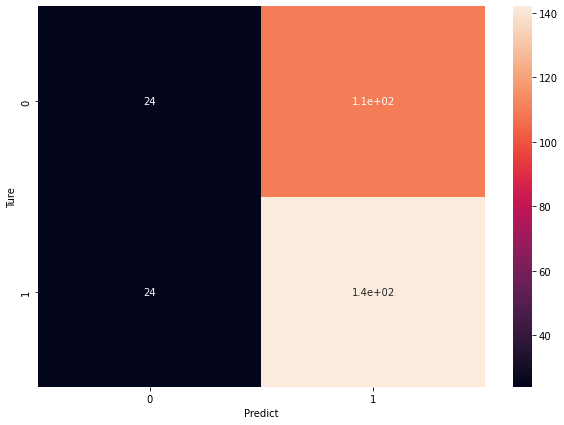

            Real  Predictors
Date                        
2011-01-28   0.0         1.0
2011-01-31   1.0         0.0
2011-02-01   1.0         1.0
2011-02-02   0.0         1.0
2011-02-03   0.0         1.0
...          ...         ...
2012-03-30   0.0         0.0
2012-04-02   1.0         0.0
2012-04-03   1.0         0.0
2012-04-04   0.0         0.0
2012-04-05   1.0         0.0

[300 rows x 2 columns]


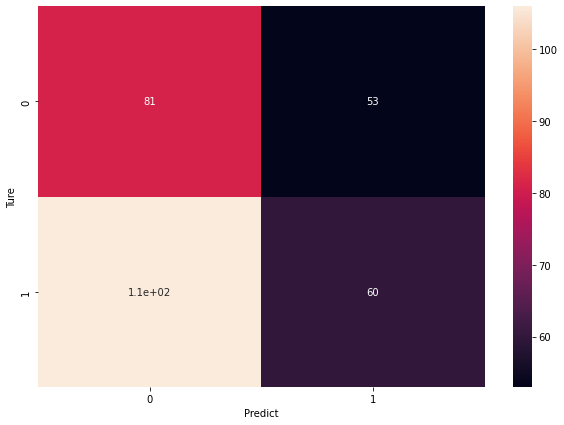

            Real  Predictors
Date                        
2012-04-09   1.0         0.0
2012-04-10   0.0         1.0
2012-04-11   0.0         0.0
2012-04-12   0.0         0.0
2012-04-13   0.0         0.0
...          ...         ...
2013-06-12   0.0         1.0
2013-06-13   1.0         0.0
2013-06-14   0.0         1.0
2013-06-17   1.0         0.0
2013-06-18   0.0         0.0

[300 rows x 2 columns]


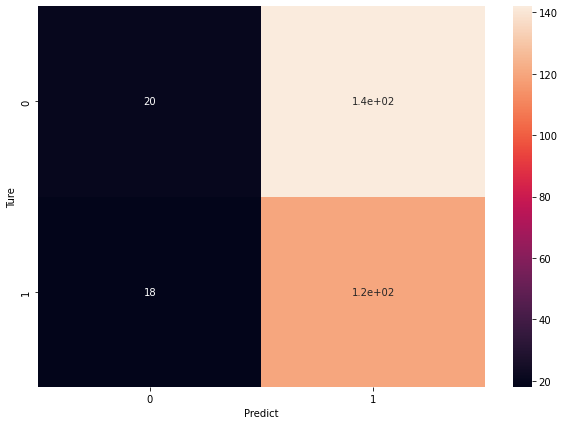

            Real  Predictors
Date                        
2013-06-19   0.0         0.0
2013-06-20   0.0         0.0
2013-06-21   0.0         0.0
2013-06-24   0.0         1.0
2013-06-25   1.0         1.0
...          ...         ...
2014-08-20   1.0         1.0
2014-08-21   1.0         0.0
2014-08-22   1.0         0.0
2014-08-25   1.0         0.0
2014-08-26   0.0         0.0

[300 rows x 2 columns]


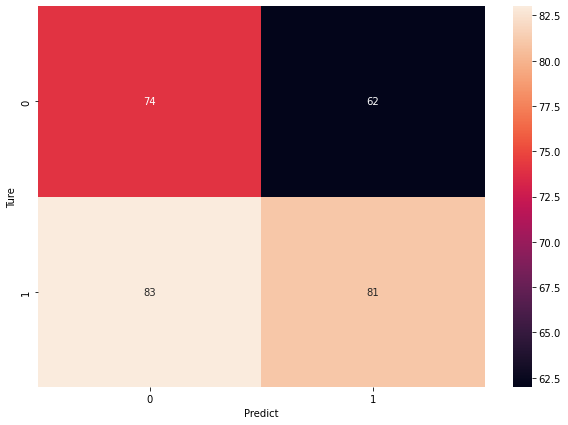

            Real  Predictors
Date                        
2014-08-27   1.0         1.0
2014-08-28   1.0         0.0
2014-08-29   1.0         0.0
2014-09-02   1.0         0.0
2014-09-03   0.0         0.0
...          ...         ...
2015-10-28   1.0         0.0
2015-10-29   1.0         0.0
2015-10-30   0.0         0.0
2015-11-02   1.0         0.0
2015-11-03   1.0         0.0

[300 rows x 2 columns]


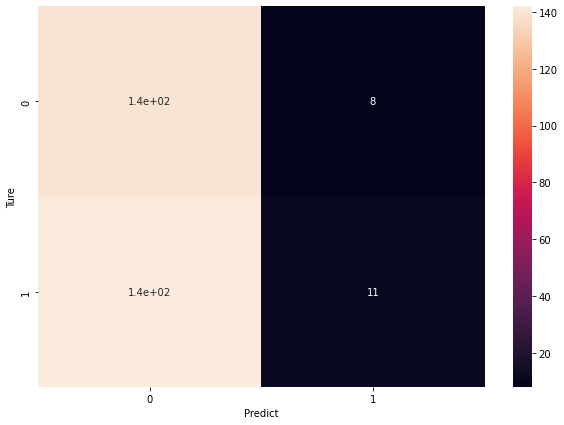

            Real  Predictors
Date                        
2015-11-04   0.0         0.0
2015-11-05   0.0         0.0
2015-11-06   1.0         1.0
2015-11-09   0.0         1.0
2015-11-10   0.0         0.0
...          ...         ...
2017-01-06   1.0         1.0
2017-01-09   1.0         1.0
2017-01-10   1.0         0.0
2017-01-11   1.0         1.0
2017-01-12   0.0         1.0

[300 rows x 2 columns]


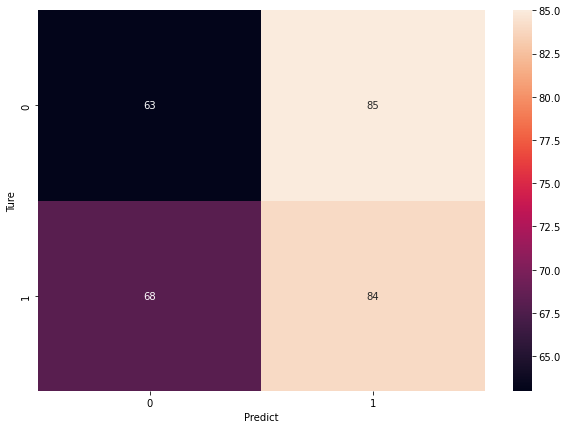

            Real  Predictors
Date                        
2017-01-13   0.0         0.0
2017-01-17   1.0         1.0
2017-01-18   0.0         0.0
2017-01-19   0.0         0.0
2017-01-20   1.0         0.0
...          ...         ...
2018-03-19   0.0         0.0
2018-03-20   0.0         0.0
2018-03-21   0.0         0.0
2018-03-22   0.0         0.0
2018-03-23   0.0         0.0

[300 rows x 2 columns]


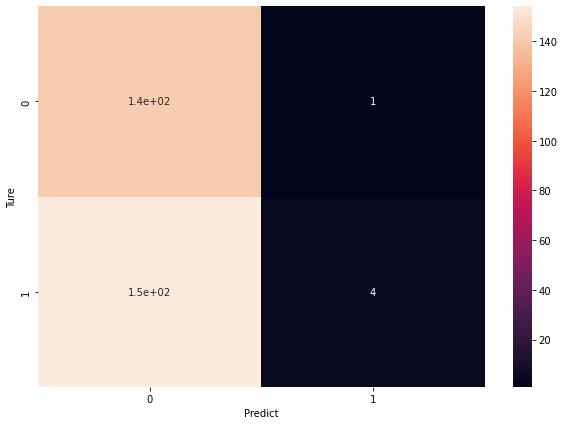

            Real  Predictors
Date                        
2018-03-26   1.0         0.0
2018-03-27   0.0         0.0
2018-03-28   0.0         1.0
2018-03-29   1.0         0.0
2018-04-02   0.0         0.0
...          ...         ...
2019-05-29   0.0         0.0
2019-05-30   1.0         0.0
2019-05-31   0.0         0.0
2019-06-03   0.0         0.0
2019-06-04   1.0         0.0

[300 rows x 2 columns]


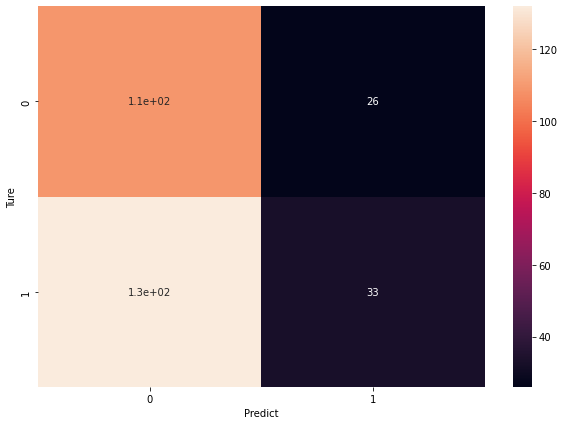

            Real  Predictors
Date                        
2019-06-05   1.0         0.0
2019-06-06   1.0         0.0
2019-06-07   1.0         1.0
2019-06-10   1.0         0.0
2019-06-11   1.0         1.0
...          ...         ...
2020-08-05   1.0         0.0
2020-08-06   1.0         0.0
2020-08-07   0.0         0.0
2020-08-10   1.0         0.0
2020-08-11   0.0         0.0

[300 rows x 2 columns]


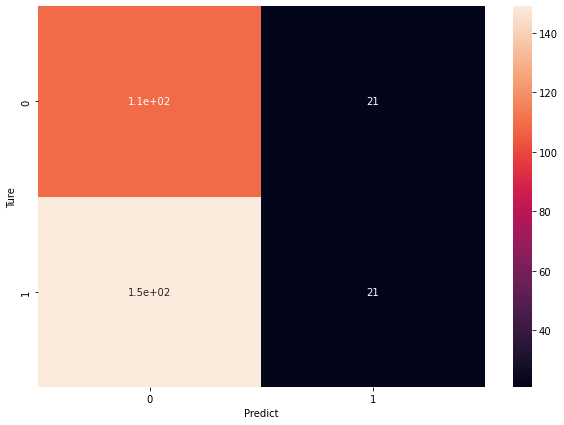

            Real  Predictors
Date                        
2020-08-12   1.0         1.0
2020-08-13   1.0         0.0
2020-08-14   0.0         0.0
2020-08-17   0.0         0.0
2020-08-18   1.0         0.0
...          ...         ...
2021-10-13   0.0         0.0
2021-10-14   1.0         0.0
2021-10-15   1.0         0.0
2021-10-18   1.0         0.0
2021-10-19   1.0         0.0

[300 rows x 2 columns]


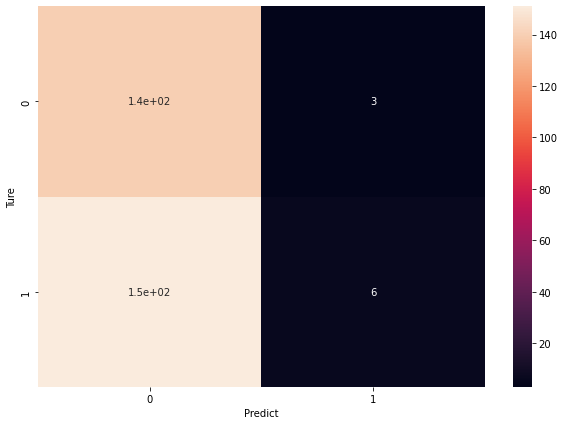

            Real  Predictors
Date                        
2021-10-20   1.0         1.0
2021-10-21   1.0         0.0
2021-10-22   0.0         0.0
2021-10-25   0.0         0.0
2021-10-26   1.0         0.0
...          ...         ...
2022-07-25   0.0         0.0
2022-07-26   0.0         0.0
2022-07-27   1.0         1.0
2022-07-28   1.0         0.0
2022-07-29   1.0         0.0

[195 rows x 2 columns]


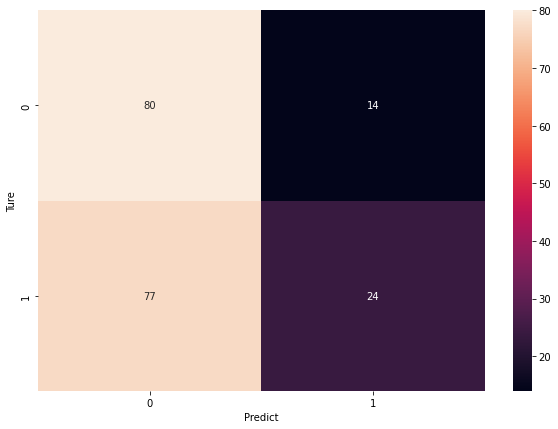

,Real,Predictors
Date,,
1984-11-27,1.0,1.0
1984-11-28,1.0,1.0
1984-11-29,0.0,1.0
1984-11-30,0.0,1.0
1984-12-03,0.0,1.0
...,...,...
2022-07-25,0.0,0.0
2022-07-26,0.0,0.0
2022-07-27,1.0,1.0


In [141]:
predictor_list =[]
start =1000
step = 300
for i in range(start , apple_recreated_dataset.shape[0] , step):
    train_data = apple_recreated_dataset.iloc[:i , :]
    test_data = apple_recreated_dataset.iloc[i :(i+step) ]
    model = RandomForestClassifier(n_jobs=6 , random_state=1 ,n_estimators =1 , criterion = "entropy" )
    model.fit(train_data[predictors] , train_data.target)
    null = model.predict(test_data[predictors])
    
    df =pd.DataFrame({"Real" : test_data.target , "Predictors" : null})
    predictions = predictor_list.append(df)
    
    print(df)
    y_predict =model.predict(test_data[predictors])
    cm =confusion_matrix(test_data.target ,y_predict)
    #print(cm)
    plt.figure(figsize =(10,7))
    sb.heatmap(cm, annot =True)
    plt.xlabel("Predict")
    plt.ylabel("Ture")
    plt.show()
    

    

for best visualization 

In [142]:
apple_df2 =pd.concat(predictor_list)
apple_df2

,Real,Predictors
Date,,
1984-11-27,1.0,1.0
1984-11-28,1.0,1.0
1984-11-29,0.0,1.0
1984-11-30,0.0,1.0
1984-12-03,0.0,1.0
...,...,...
2022-07-25,0.0,0.0
2022-07-26,0.0,0.0
2022-07-27,1.0,1.0
